<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Naive-Bayes-and-ROC-/blob/main/Precision_recall_vs_ROC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the name of GOD

# Mohammad Mahdi Shafighy

# ROC(AUC) vs Precition/recall curve

# Step 1: Generate Dataset


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, classification_report

X, y = make_classification(
    n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 2: Train Good Model (Naive Bayes)


In [5]:
good_model = GaussianNB()
good_model.fit(X_train, y_train)
good_probs = good_model.predict_proba(X_test)[:, 1]


# Step 3: Train Very Good Model (Random Forest)


In [6]:
very_good_model = RandomForestClassifier(n_estimators=100, random_state=42)
very_good_model.fit(X_train, y_train)
very_good_probs = very_good_model.predict_proba(X_test)[:, 1]


# Step 4: Calculate ROC Metrics


In [7]:
good_fpr, good_tpr, _ = roc_curve(y_test, good_probs)
very_good_fpr, very_good_tpr, _ = roc_curve(y_test, very_good_probs)
good_auc = roc_auc_score(y_test, good_probs)
very_good_auc = roc_auc_score(y_test, very_good_probs)

# Step 5: Compare Metrics


In [8]:
print("Good Model Performance:")
print(classification_report(y_test, good_model.predict(X_test)))
print("Very Good Model Performance:")
print(classification_report(y_test, very_good_model.predict(X_test)))


Good Model Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       160
           1       0.81      0.77      0.79       140

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300

Very Good Model Performance:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       160
           1       0.87      0.96      0.92       140

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Step 6: Plot ROC Curves


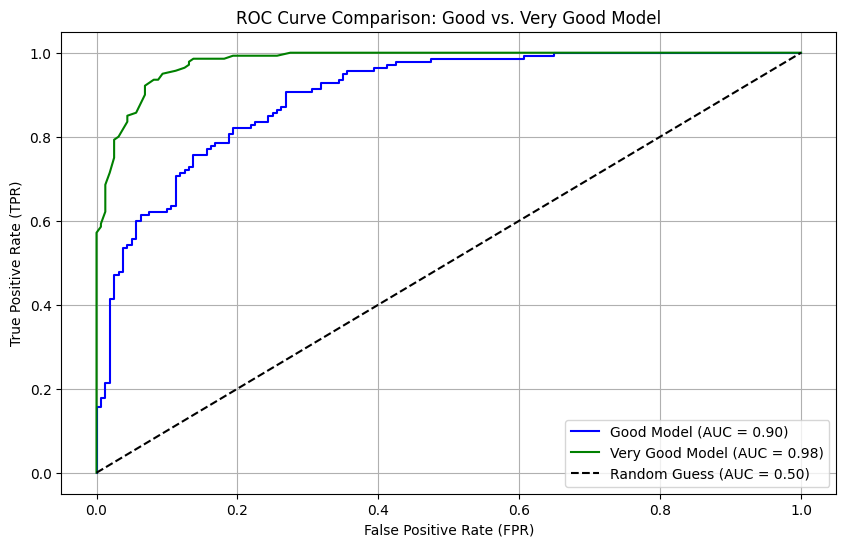

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(good_fpr, good_tpr, label=f"Good Model (AUC = {good_auc:.2f})", color='blue')
plt.plot(very_good_fpr, very_good_tpr, label=f"Very Good Model (AUC = {very_good_auc:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.title("ROC Curve Comparison: Good vs. Very Good Model")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# 1. ROC Curve and AUC
# Assuming you want to use the probabilities from the 'very_good_model' (Random Forest)

## Assign y_scores to the desired probabilities

In [13]:
y_scores = very_good_probs

fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)

## using roc_auc_score instead of auc

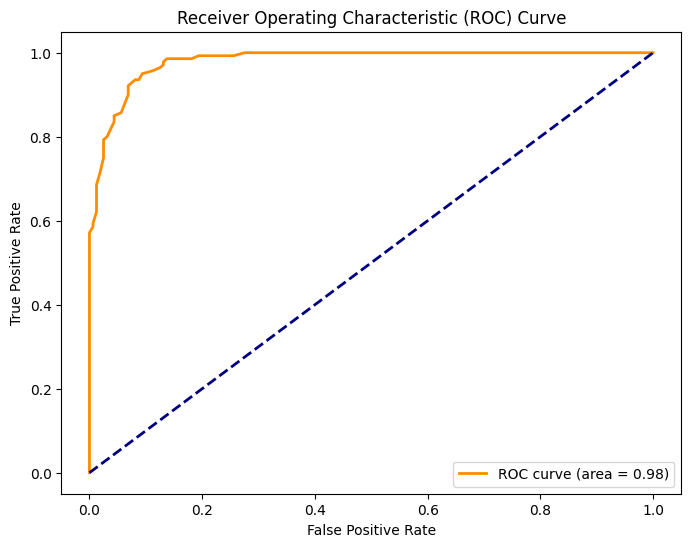

In [14]:
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# 2. Precision-Recall Curve and Average Precision


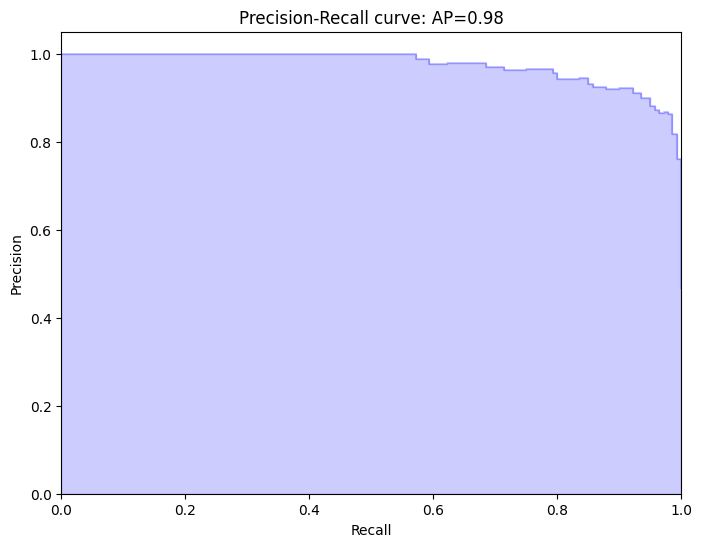

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
average_precision = average_precision_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall curve: AP={average_precision:.2f}')
plt.show()